# LeNet5

LeNet 诞生于 1994 年，是最早的卷积神经网络之一，并且推动了深度学习领域的发展。自从 1998 年开始，在多次迭代后这个开拓性成果被命名为 LeNet5。LeNet5 的架构的提出是基于如下的观点：图像的特征分布在整张图像上，通过带有可学习参数的卷积，从而有效的减少了参数数量，能够在多个位置上提取相似特征。

在LeNet5提出的时候，没有 GPU 帮助训练，甚至 CPU 的速度也很慢，因此，LeNet5的规模并不大。其包含七个处理层，每一层都包含可训练参数（权重），当时使用的输入数据是 $32 \times 32$ 像素的图像。LeNet-5 这个网络虽然很小，但是它包含了深度学习的基本模块：卷积层，池化层，全连接层。它是其他深度学习模型的基础，这里对LeNet5进行深入分析和讲解，通过实例分析，加深对与卷积层和池化层的理解。

LeNet5的网络架构如下图所示：
![LeNet5](images/fig-dl-lenet5-netarch-crop.jpg)

定义网络为：

In [2]:
import torch
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # 1-input channel, 6-output channels, 5x5-conv
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 6-input channel, 16-output channels, 5x5-conv
        self.conv2 = nn.Conv2d(6, 16, 5)
        # FIXME: conv? why linear? 16x5x5-input, 120-output
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        # 120-input, 84-output
        self.fc2 = nn.Linear(120, 84)
        # 84-input, 10-output
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = torch.flatten(x, 1) # 将结果拉升成1维向量，除了批次的维度
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
net = LeNet5()
print(net)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [9]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0514, -0.1164, -0.0811, -0.0385, -0.1080,  0.0972,  0.0818, -0.2156,
          0.0617,  0.0660]], grad_fn=<AddmmBackward0>)


In [10]:
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
from torchvision import transforms as tfs
from utils import train

# 使用数据增强
def data_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(32),
        tfs.ToTensor() #,
        #tfs.Normalize([0.5], [0.5])
    ])
    x = im_aug(x)
    return x
     
train_set  = mnist.MNIST('../../data/mnist', train=True,  transform=data_tf, download=True) 
train_data = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set   = mnist.MNIST('../../data/mnist', train=False, transform=data_tf, download=True) 
test_data  = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

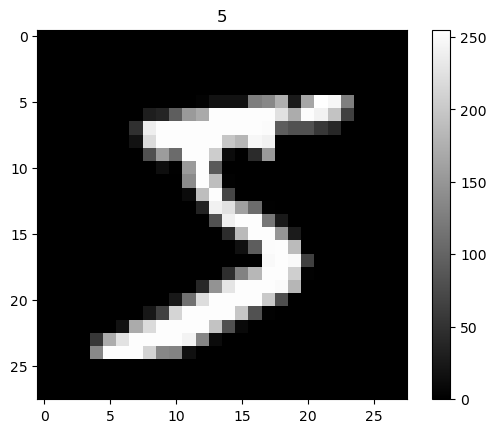

In [11]:
# 显示其中一个数据
import matplotlib.pyplot as plt
plt.imshow(train_set.data[0], cmap='gray')
plt.title('%i' % train_set.targets[0])
plt.colorbar()
plt.show()

torch.Size([64, 1, 32, 32])
torch.Size([64])


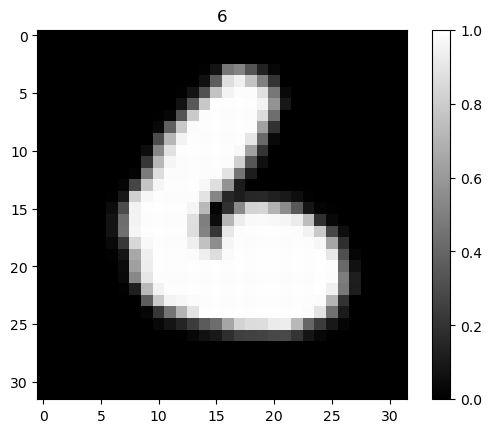

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [12]:
import matplotlib.pyplot as plt

# 显示转化后的图像
for im, label in train_data:
    print(im.shape)
    print(label.shape)
    
    img = im[0,0,:,:]
    lab = label[0]
    plt.imshow(img, cmap='gray')
    plt.title('%i' % lab)
    plt.colorbar()
    plt.show()

    print(im[0,0,:,:])
    break

In [13]:
net = LeNet5()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

res = train(net, train_data, test_data, 20, optimizer, criterion)

[ 0] Train:(L=0.296085, Acc=0.906433), Valid:(L=0.082798, Acc=0.972607), T: 00:00:06
[ 1] Train:(L=0.080560, Acc=0.975063), Valid:(L=0.059240, Acc=0.980617), T: 00:00:06
[ 2] Train:(L=0.055143, Acc=0.982809), Valid:(L=0.045488, Acc=0.984276), T: 00:00:06
[ 3] Train:(L=0.043518, Acc=0.986857), Valid:(L=0.035227, Acc=0.989221), T: 00:00:06
[ 4] Train:(L=0.036983, Acc=0.988806), Valid:(L=0.045601, Acc=0.985463), T: 00:00:06
[ 5] Train:(L=0.030410, Acc=0.990655), Valid:(L=0.032655, Acc=0.990111), T: 00:00:06
[ 6] Train:(L=0.026781, Acc=0.991405), Valid:(L=0.034121, Acc=0.988726), T: 00:00:05
[ 7] Train:(L=0.021667, Acc=0.992970), Valid:(L=0.038080, Acc=0.988627), T: 00:00:05
[ 8] Train:(L=0.019541, Acc=0.993520), Valid:(L=0.035085, Acc=0.989023), T: 00:00:05
[ 9] Train:(L=0.016473, Acc=0.994769), Valid:(L=0.036979, Acc=0.989320), T: 00:00:06
[10] Train:(L=0.015018, Acc=0.994986), Valid:(L=0.033939, Acc=0.990111), T: 00:00:06
[11] Train:(L=0.013333, Acc=0.995502), Valid:(L=0.034529, Acc=0.9

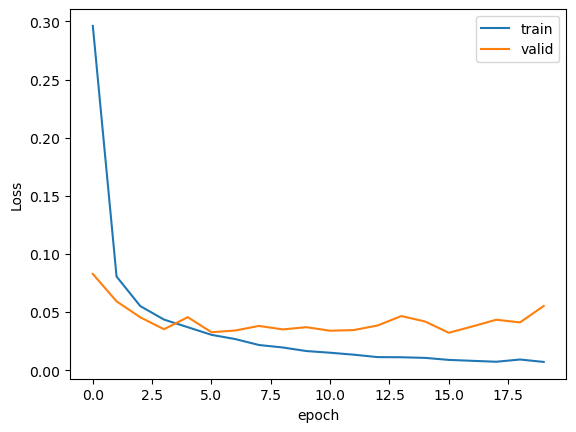

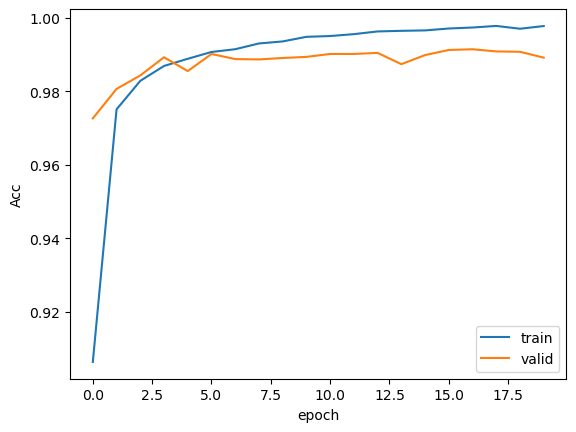

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(res[0], label='train')
plt.plot(res[2], label='valid')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('fig-res-lenet5-train-validate-loss.pdf')
plt.show()

plt.plot(res[1], label='train')
plt.plot(res[3], label='valid')
plt.xlabel('epoch')
plt.ylabel('Acc')
plt.legend(loc='best')
plt.savefig('fig-res-lenet5-train-validate-acc.pdf')
plt.show()